In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wg
wg.filterwarnings("ignore")

In [57]:
songs=pd.read_csv("fma-rock-vs-hiphop.csv")

In [58]:
songs.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [59]:
echonest_metrics=pd.read_json("echonest-metrics.json")

In [60]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [61]:
echo_track=pd.merge(left=songs[["track_id","genre_top"]],right=echonest_metrics,on="track_id")

In [62]:
echo_track.head(10)

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548
5,171,Rock,0.698278,0.285816,0.213494,0.955691,0.087036,0.064094,125.645,0.150599
6,172,Rock,0.815549,0.144125,0.892721,0.900430,0.104703,0.102294,138.680,0.034916
7,173,Rock,0.842113,0.285293,0.564689,0.951624,0.110481,0.040611,166.552,0.254299
8,174,Rock,0.367393,0.339698,0.846639,0.909186,0.198944,0.462607,70.887,0.048243
9,175,Rock,0.993928,0.310090,0.952493,0.274311,0.354231,0.825744,69.413,0.033402


In [63]:
echo_track.size

48020

In [64]:
echo_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 393.9+ KB


# Data Visualization

<AxesSubplot:xlabel='genre_top', ylabel='count'>

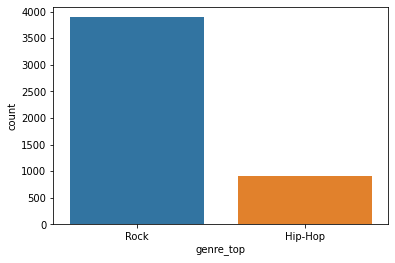

In [65]:
sns.countplot(echo_track["genre_top"])

In [66]:
echo_track.corr()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


<AxesSubplot:>

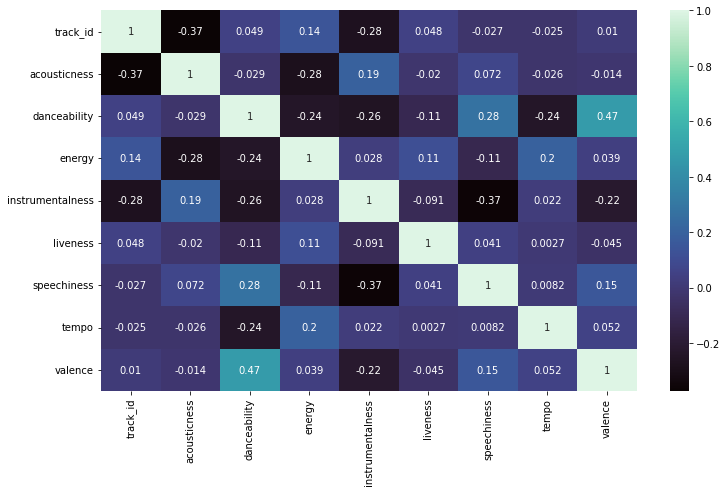

In [67]:
plt.figure(figsize=(12,7))
sns.heatmap(echo_track.corr(),cmap ='mako',annot=True)

Here we can see an interesting correlation between danceability and valence, but it's not strong enough.

# 3. Normalizing the feature data

In [68]:
# Define our features 
features=echo_track.drop(['track_id','genre_top'],axis=1)

In [69]:
# Define our labels
labels = echo_track['genre_top']

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
# Scale the features and set the values to a new variable
scaler = StandardScaler()
train_features = scaler.fit_transform(features)

# 4. Principal Component Analysis on our scaled data

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca=PCA()

In [74]:
pca.fit(train_features)
exp_variance=pca.explained_variance_ratio_
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

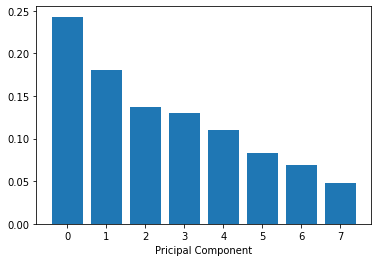

In [75]:

# plot the explained variance using a barplot
fig,ax=plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel("Pricipal Component")
plt.show()

# 5. Further visualization of PCA

In [76]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

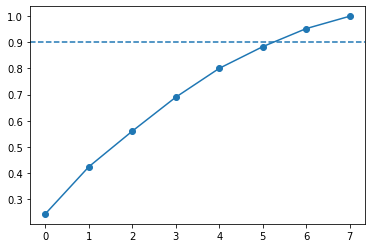

In [128]:
# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(8),cum_exp_variance, 'o-')
ax.axhline(y=0.9, linestyle='--')
plt.show()

In [78]:
n_components = 7

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(train_features)
pca_projection = pca.transform(train_features)

In [79]:
pca_projection.shape

(4802, 7)

# 6. Train a decision tree to classify genre

In [80]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# Split our data
train_X, test_X, train_y, test_y = train_test_split(pca_projection, labels, stratify =labels)

# Train our decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(train_X, train_y)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_X)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,pred_labels_tree)

0.8751040799333888

In [82]:
labels.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,pred_labels_tree)

array([[147,  81],
       [ 69, 904]], dtype=int64)

# 7. Compare our decision tree to a logistic regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logistic=LogisticRegression(random_state=10)

In [86]:
logistic.fit(train_X,train_y)

LogisticRegression(random_state=10)

In [87]:
pred_labels_logistic=logistic.predict(test_X)

In [88]:
accuracy_score(test_y,pred_labels_logistic)

0.8950874271440467

In [89]:
confusion_matrix(test_y,pred_labels_logistic)

array([[133,  95],
       [ 31, 942]], dtype=int64)

## CLASSIFICATION REPORT

In [90]:
from sklearn.metrics import classification_report

In [91]:
tree_report=classification_report(test_y,pred_labels_tree)


In [92]:
print("Tree Classification Report\n",tree_report)

Tree Classification Report
               precision    recall  f1-score   support

     Hip-Hop       0.68      0.64      0.66       228
        Rock       0.92      0.93      0.92       973

    accuracy                           0.88      1201
   macro avg       0.80      0.79      0.79      1201
weighted avg       0.87      0.88      0.87      1201



In [93]:
logistic_report=classification_report(test_y,pred_labels_logistic)

In [94]:
print("Tree Classification Report\n",logistic_report)

Tree Classification Report
               precision    recall  f1-score   support

     Hip-Hop       0.81      0.58      0.68       228
        Rock       0.91      0.97      0.94       973

    accuracy                           0.90      1201
   macro avg       0.86      0.78      0.81      1201
weighted avg       0.89      0.90      0.89      1201



# 8. Balance our data for greater performance

In [95]:
hop = echo_track.loc[echo_track['genre_top']=='Hip-Hop']
hop.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
3892,2,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3893,3,Hip-Hop,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
3894,5,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3895,134,Hip-Hop,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
3896,583,Hip-Hop,0.748986,0.765886,0.513173,0.957209,0.614844,0.886914,180.025,0.401672


In [96]:
rock=echo_track.loc[echo_track['genre_top']=='Rock']
rock.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [97]:
rock.shape,hop.shape

((3892, 10), (910, 10))

In [98]:
rock= rock.sample(n=hop.shape[0])
rock.shape

(910, 10)

In [99]:
# Subset only the hip-hop tracks, and then only the rock tracks
rock_hop_bal=pd.concat([rock,hop])

In [100]:
rock_hop_bal.shape

(1820, 10)

In [101]:
# The features, labels, and pca projection are created for the balanced dataframe
features=rock_hop_bal.drop(['genre_top','track_id'],axis=1)
labels=rock_hop_bal['genre_top']
pca_projection=pca.fit_transform(scaler.fit_transform(features))
train_X,test_X,train_y,test_y=train_test_split(pca_projection,labels,stratify=labels,random_state=10)


# 9. Does balancing our dataset improve model bias?

### Decision tree

In [110]:
tree=DecisionTreeClassifier(random_state=1)
tree.fit(train_X,train_y)
tree_preds=tree.predict(test_X)


### Logistic Regression

In [111]:
logreg=LogisticRegression(random_state=1)
logreg.fit(train_X,train_y)
logreg_preds=logreg.predict(test_X)

Compare the models

In [112]:

print("Decision Tree: \n", classification_report(test_y,tree_preds))
print("Logistic Regression: \n", classification_report(test_y, logreg_preds))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.79      0.76      0.77       227
        Rock       0.77      0.80      0.79       228

    accuracy                           0.78       455
   macro avg       0.78      0.78      0.78       455
weighted avg       0.78      0.78      0.78       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.90      0.81      0.85       227
        Rock       0.82      0.91      0.86       228

    accuracy                           0.86       455
   macro avg       0.86      0.86      0.86       455
weighted avg       0.86      0.86      0.86       455



# 10. Using cross-validation to evaluate our models

In [120]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=10)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

In [121]:
tree_score=cross_val_score(tree,pca_projection,labels,cv=kf)
logreg_score=cross_val_score(logreg,pca_projection,labels,cv=kf)

In [122]:
print("Tree score:",np.mean(tree_score))

Tree score: 0.7780219780219779


In [123]:
print("logreg score:",np.mean(logreg_score))

logreg score: 0.8214285714285715


**Therefore Logistic Regression provides better score than DecisonTreeClassifier**